In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

from glob import glob
from os import listdir, mkdir, getcwd, remove
from os.path import isfile, join, basename, isdir

from analysis.convert_directory import convert_directory
from analysis.split_event_tree import split_event_tree,ttype_column
from analysis.calc import calc_nll
from analysis.import_data import import_data,filter_data,combine_columns

In [ ]:
production_mode      = True   # Switch the source and output directories accordingly
production_plot_mode = False  # Switch to either use ROOT (True) of matplotlib (False)
clear_output         = False  # Clear all existing output files before executing

source_path = "/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison" if production_mode else "/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/scripts/root/dev"
#source_path = join("/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/", "scripts") # getcwd()
output_path = join("/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/scripts/.npy", "prod" if production_mode else "dev")

# Convert all .root files inside source_path to .npy files in output_path
# Note: Data in .root files is organized in a tree structure. We will use the name "dataTree" here
if clear_output:
    for abs_path in glob(join(output_path, "*.npy")):
        remove(abs_path)
    
convert_directory(source_path, "dataTree", output_path)

files = list(map(lambda e: join(output_path, e), listdir(output_path)))
files.sort()
files

['/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/scripts/.npy/dev/compare_mcparticle.root.npy',
 '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/scripts/.npy/dev/compare_reco.root.npy',
 '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/scripts/.npy/dev/compare_truejet.root.npy']

: 

In [ ]:
if production_plot_mode:
    from analysis.plot_root import plot_hist    
else:
    from analysis.plot_matplotlib import plot_hist

In [53]:
# Import the complete generator-level(MCParticle)-, reconstruction-(reco) and truejet-datasets 
raw_mcparticle = import_data(files[0])
raw_reco       = import_data(files[1])
raw_truejet    = import_data(files[2])

# Filter the table to only contain entries without errors (error_code = 0) and with matrix elements > 0 for ZHH and ZZH (zhh_sigmalr and zzh_sigmalr)
data_mcparticle = filter_data(raw_mcparticle)
data_reco       = filter_data(raw_reco)
data_truejet    = filter_data(raw_truejet)

# Calculate the negative log likelihood based on the matrix elements 
data_mcparticle = calc_nll(data_mcparticle)
data_reco       = calc_nll(data_reco)
data_truejet    = calc_nll(data_truejet)

In [44]:
import uproot as ur
from typing import Optional

type_map = {
    "int32_t": "i4"
}

def convert_type(type_name: str):
    if type_name in type_map:
        return type_map[type_name]
    else:
        return type_name

def root_to_numpy(source_path, in_file_location, merge_with_np_array: Optional[np.ndarray] = None, join_by: Optional[list]=None):
    with ur.open(source_path) as file:
        # Find data in file
        data = file[in_file_location]
        keys = data.keys()

        # Get correct column names and types for conversion
        dtype_arr = []
        dtype_names = data.typenames()

        for field_name in dtype_names:
            dtype_arr.append((field_name, convert_type(dtype_names[field_name])))
            d
        dtype_names2 = []
        if merge_with_np_array is not None and join_by is not None:
            dtype_names2 = merge_with_np_array.typenames()
            keys = keys + list(set(dtype_names2) - set(keys))
            
            for field_name in dtype_names2:
                if field_name not in dtype_names:
                    dtype_arr.append((field_name, convert_type(dtype_names[field_name])))

        # Convert data to (column-wise) arrays using numpy
        out = np.zeros(data.num_entries, dtype=dtype_arr)

        for i in range(0, len(keys)):
            key = keys[i]
            out[key] = data[key].array()
        
        if merge_with_np_array is not None and join_by is not None:
            join_by_a = out[join_by]
            
            mask_selection = merge_with_np_array[merge_with_np_array[join_by[0]] == out[join_by[0]]]
            for i in range(1, len(join_by)):
                mask_selection = mask_selection & merge_with_np_array[merge_with_np_array[join_by[i]] == out[join_by[i]]]
            
            intersection = merge_with_np_array[mask]
            
            
            
            for i in range(0, len(intersection)):
                for j in range(0, len(dtype_names2)):
            
            for field_name in dtype_names2:
                out[field_name] = intersection[field_name]

    return out

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [28]:
a = glob(join(source_path, "*.root"))

In [29]:
b = root_to_numpy(a[0], "dataTree")

In [32]:
c = root_to_numpy(a[1], "dataTree")

In [39]:
b[(b["run"] == c["run"]) & (b["event"] == c["event"])]

array([(403001, 15001, 1200, 1, 0, 1,  5, 24, 0,  1, -1, 0, 0, 0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  0.        , 0., 0., 0., 0., 0., 0., 0., 0.),
       (403001, 15002, 1203, 1, 0, 1, 15,  5, 0, -1, -1, 0, 0, 0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  0.        , 0., 0., 0., 0., 0., 0., 0., 0.),
       (403001, 15003, 1203, 1, 0, 1, 24,  3, 0, -1, -1, 0, 0, 0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  0.        , 0., 0., 0., 0., 0., 0., 0., 0.),
       ...,
       (403011, 77485, 1203, 0, 1, 1, 24,  0, 2, -1, -1, 0, 0, 0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 90.32722473, 0., 0., 0., 0., 0., 0., 0., 0.),
       (403011, 77486,    1, 0, 0, 0,  0,  0, 0, -1, -1, 0, 0, 0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [54]:
data_reco.columns

Index(['run', 'event', 'error_code', 'is_zhh', 'is_zzh', 'passed_preselection',
       'true_h1_decay_pdg', 'true_h2_decay_pdg', 'true_z2_decay_pdg',
       'misclustering_region', 'misclustering_region_icns', 'efrac1_reco',
       'efrac2_reco', 'efrac1_true', 'efrac2_true', 'efrac1_icn_reco',
       'efrac2_icn_reco', 'efrac1_icn_true', 'efrac2_icn_true', 'h1_decay_pdg',
       'h2_decay_pdg', 'z2_decay_pdg', 'zhh_sigma', 'zhh_sigmall',
       'zhh_sigmalr', 'zhh_sigmarl', 'zhh_sigmarr', 'zhh_mz', 'zhh_mhh',
       'zhh_mzhh', 'zhh_phi', 'zhh_phif', 'zhh_phih', 'zhh_costheta',
       'zhh_costhetaf', 'zhh_costhetah', 'zzh_sigma', 'zzh_sigmalll',
       'zzh_sigmallr', 'zzh_sigmalrl', 'zzh_sigmalrr', 'zzh_sigmarrr',
       'zzh_sigmarrl', 'zzh_sigmarlr', 'zzh_sigmarll', 'zzh_mz1', 'zzh_mz2',
       'zzh_mzz', 'zzh_mzzh', 'zzh_mh', 'zzh_phi', 'zzh_phiz', 'zzh_phiz1f',
       'zzh_phiz2f', 'zzh_costheta', 'zzh_costhetaz', 'zzh_costhetaz1f',
       'zzh_costhetaz2f', 'zzh_sigmalr', 'true

<Axes: xlabel='efrac1_reco', ylabel='efrac1_true'>

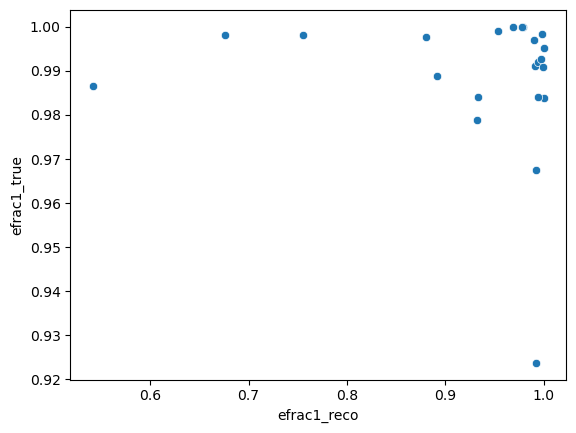

: 

In [55]:
sns.scatterplot(data_reco, x="efrac1_reco", y="efrac1_true")

Comparing all (raw) and filtered (data) events

Text(0.5, 1.0, 'TrueJet / ZZH')

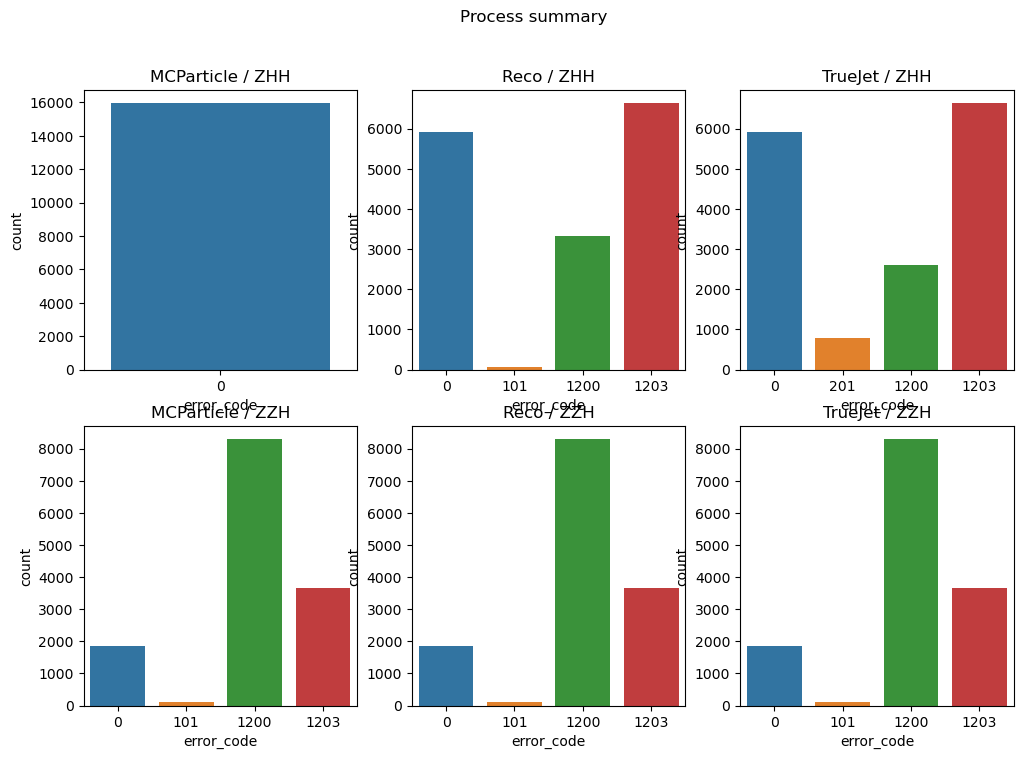

In [7]:
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(12,8))
fig.suptitle("Process summary")

fig1 = sns.countplot(raw_mcparticle[raw_mcparticle["is_zhh"] == 1], x="error_code", ax=ax11)
fig1.set_title("MCParticle / ZHH")

fig2 = sns.countplot(raw_reco[raw_reco["is_zhh"] == 1], x="error_code", ax=ax12)
fig2.set_title("Reco / ZHH")

fig3 = sns.countplot(raw_truejet[raw_truejet["is_zhh"] == 1], x="error_code", ax=ax13)
fig3.set_title("TrueJet / ZHH")

fig4 = sns.countplot(raw_reco[raw_reco["is_zzh"] == 1], x="error_code", ax=ax21)
fig4.set_title("MCParticle / ZZH")

fig5 = sns.countplot(raw_reco[raw_reco["is_zzh"] == 1], x="error_code", ax=ax22)
fig5.set_title("Reco / ZZH")

fig6 = sns.countplot(raw_reco[raw_reco["is_zzh"] == 1], x="error_code", ax=ax23)
fig6.set_title("TrueJet / ZZH")

<Axes: xlabel='zzh_nll', ylabel='Count'>

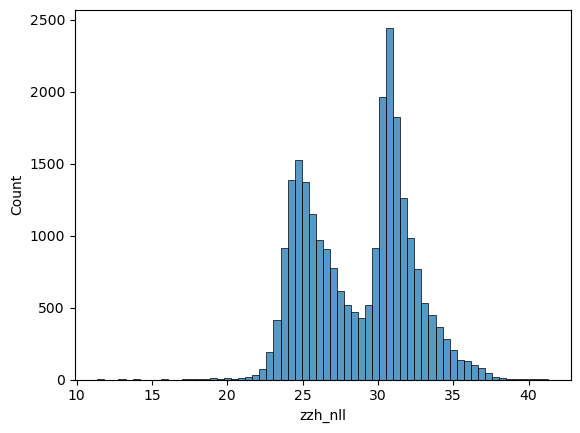

In [8]:
sns.histplot(data_mcparticle, x="zzh_nll", bins=64)

<Axes: xlabel='h1_decay_pdg', ylabel='count'>

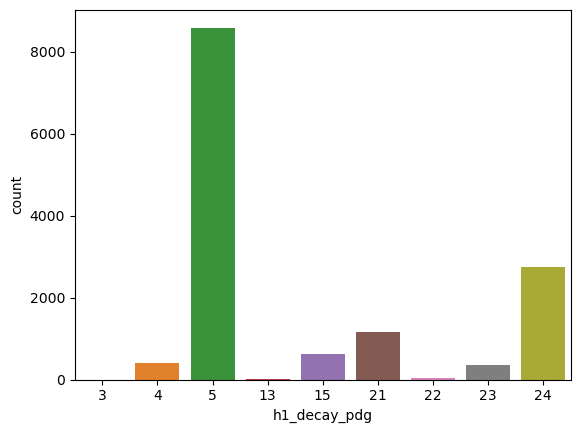

In [7]:
sns.countplot(data_mcparticle[(data_mcparticle["is_zzh"] == 1) & (data_mcparticle["error_code"] == 0)], x="h1_decay_pdg")

<Axes: xlabel='zhh_costhetaf', ylabel='Count'>

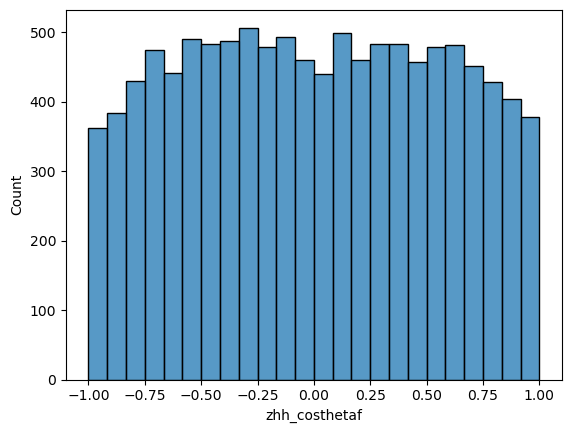

In [8]:
sns.histplot(data_mcparticle[data_mcparticle["is_zhh"] == 1]["zhh_costhetaf"])

<Axes: xlabel='zzh_costhetaz', ylabel='Count'>

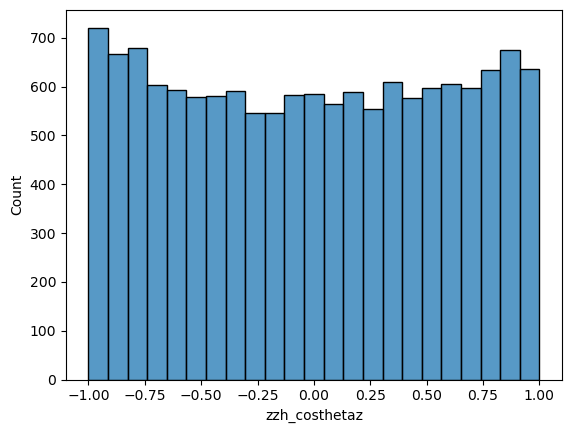

In [10]:
sns.histplot(data_mcparticle[data_mcparticle["is_zzh"] == 1]["zzh_costhetaz"])

In [12]:
def plot_hist(data, x, labels=None, colorpalette=None, bins=128, xlabel="", ylabel="", units="", normalize=False, title="Likelihood-Analysis"):
    g_min = 0.98*data[x].min().min()
    g_max = 1.02*data[x].max().max()
    
    for i in x:
        plt.hist(data[x[i]], bins)
    
    plt.show()

1. MCTruth

In [17]:
true_zzh = data_mcparticle[(data_mcparticle["is_zzh"] == 1) & (data_mcparticle["zhh_sigma"] > 0) & (data_mcparticle["zzh_sigma"] > 0)].copy()
true_zhh = data_mcparticle[(data_mcparticle["is_zhh"] == 1) & (data_mcparticle["zhh_sigma"] > 0) & (data_mcparticle["zzh_sigma"] > 0)].copy()

true_zzh.reset_index(drop=True,inplace=True)
true_zhh.reset_index(drop=True,inplace=True)

llr = combine_columns({ "zhh_llr": true_zhh["llr"], "zzh_llr": true_zzh["llr"] })

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH MCTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH MCTruth (Potential memory leak).


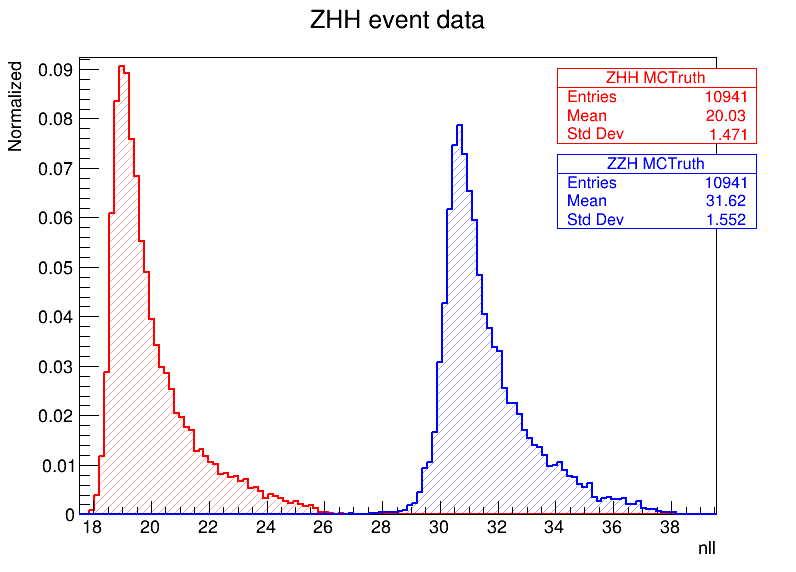

In [18]:
plot_hist(true_zhh, x = ["zhh_nll", "zzh_nll"], title="ZHH event data", normalize=True, labels=["ZHH MCTruth", "ZZH MCTruth"], xlabel="nll")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH MCTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH MCTruth (Potential memory leak).


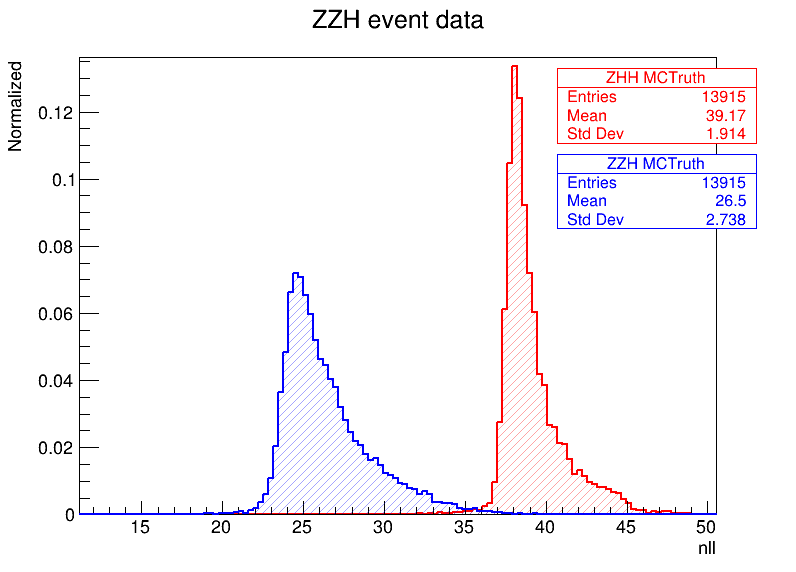

In [12]:
plot_hist(true_zzh, x = ["zhh_nll", "zzh_nll"], title="ZZH event data", normalize=True, labels=["ZHH MCTruth", "ZZH MCTruth"], xlabel="nll")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH event data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH event data (Potential memory leak).


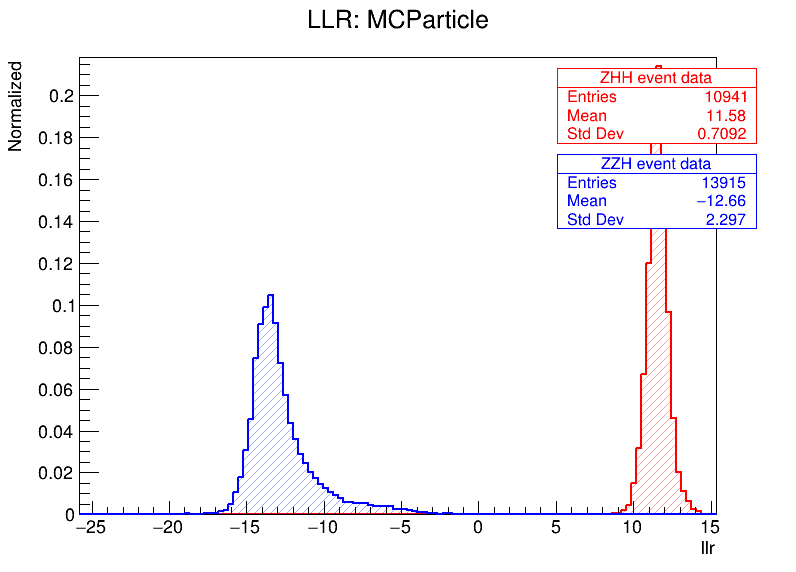

In [19]:
plot_hist(llr, x = ["zhh_llr", "zzh_llr"], labels=["ZHH event data", "ZZH event data"], title="LLR: MCParticle", normalize=True, xlabel="llr")

2. RefinedJets

In [24]:
true_zzh = data_reco[(data_reco["is_zzh"] == 1) & (data_reco["zhh_sigmalr"] > 0) & (data_reco["zzh_sigmalr"] > 0)].copy()
true_zhh = data_reco[(data_reco["is_zhh"] == 1) & (data_reco["zhh_sigmalr"] > 0) & (data_reco["zzh_sigmalr"] > 0)].copy()

true_zzh.reset_index(drop=True,inplace=True)
true_zhh.reset_index(drop=True,inplace=True)

llr = combine_columns({ "zhh_llr": true_zhh["llr"], "zzh_llr": true_zzh["llr"] })

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH Reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH Reco (Potential memory leak).


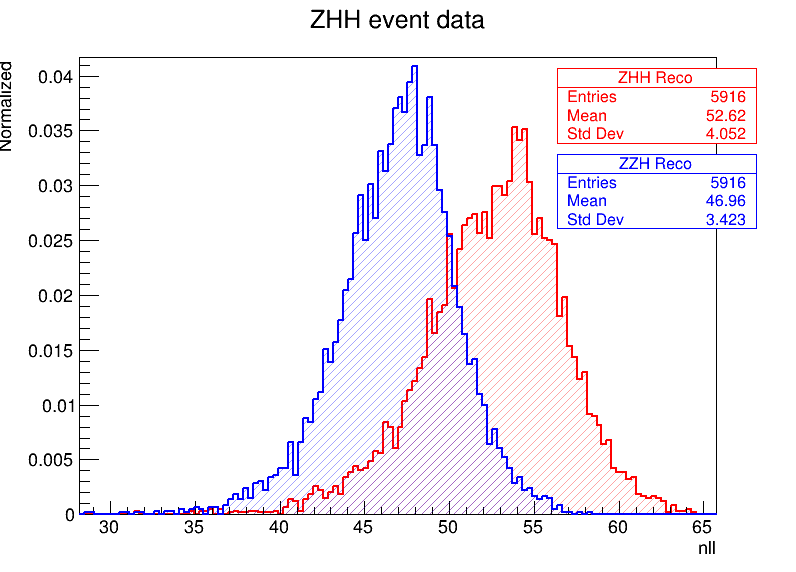

In [25]:
plot_hist(true_zhh, x = ["zhh_nll", "zzh_nll"], title="ZHH event data", normalize=True, labels=["ZHH Reco", "ZZH Reco"], xlabel="nll")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH Reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH Reco (Potential memory leak).


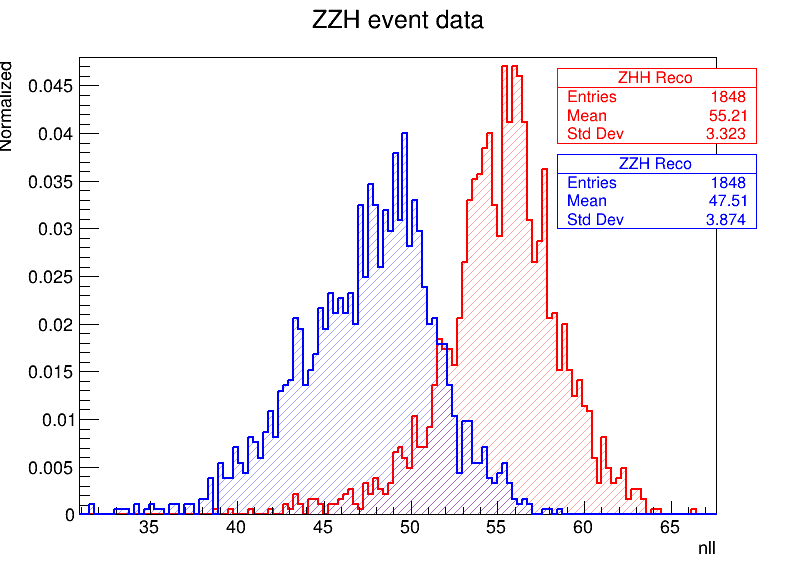

In [26]:
plot_hist(true_zzh, x = ["zhh_nll", "zzh_nll"], title="ZZH event data", normalize=True, labels=["ZHH Reco", "ZZH Reco"], xlabel="nll")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH event data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH event data (Potential memory leak).


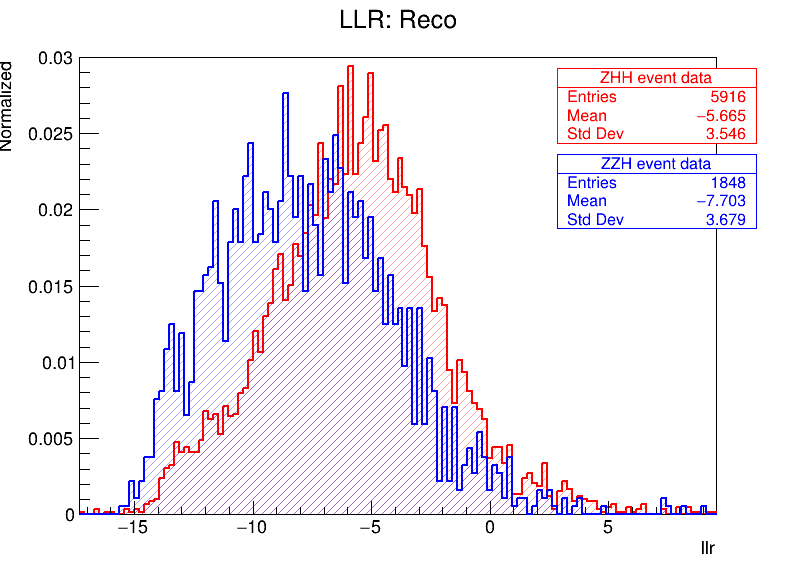

In [27]:
plot_hist(llr, x = ["zhh_llr", "zzh_llr"], labels=["ZHH event data", "ZZH event data"], title="LLR: Reco", normalize=True, xlabel="llr")

3. TrueJet

In [18]:
true_zzh = data_truejet[(data_truejet["is_zzh"] == 1) & (data_truejet["zhh_sigmalr"] > 0) & (data_truejet["zzh_sigmalr"] > 0)].copy()
true_zhh = data_truejet[(data_truejet["is_zhh"] == 1) & (data_truejet["zhh_sigmalr"] > 0) & (data_truejet["zzh_sigmalr"] > 0)].copy()

true_zzh.reset_index(drop=True,inplace=True)
true_zhh.reset_index(drop=True,inplace=True)

llr = combine_columns({ "zhh_llr": true_zhh["llr"], "zzh_llr": true_zzh["llr"] })

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name


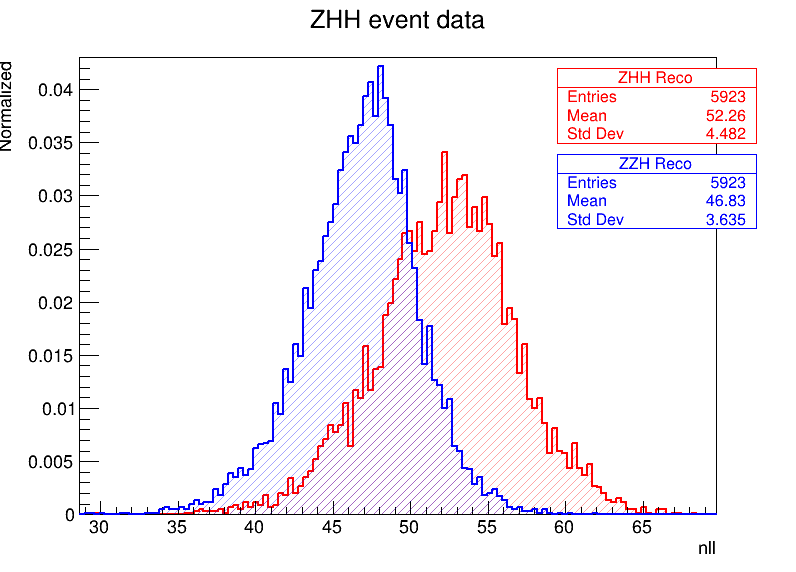

In [19]:
plot_hist(true_zhh, x = ["zhh_nll", "zzh_nll"], title="ZHH event data", normalize=True, labels=["ZHH Reco", "ZZH Reco"], xlabel="nll")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH Reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH Reco (Potential memory leak).


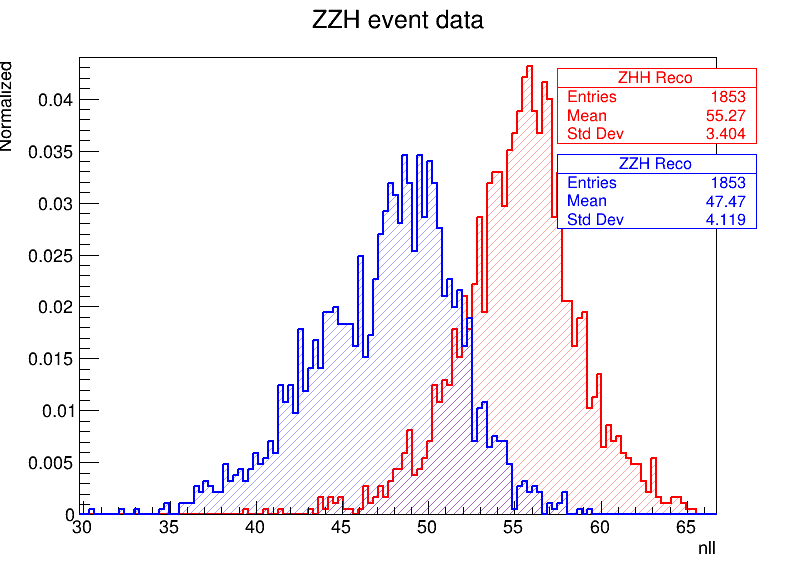

In [20]:
plot_hist(true_zzh, x = ["zhh_nll", "zzh_nll"], title="ZZH event data", normalize=True, labels=["ZHH Reco", "ZZH Reco"], xlabel="nll")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH event data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH event data (Potential memory leak).


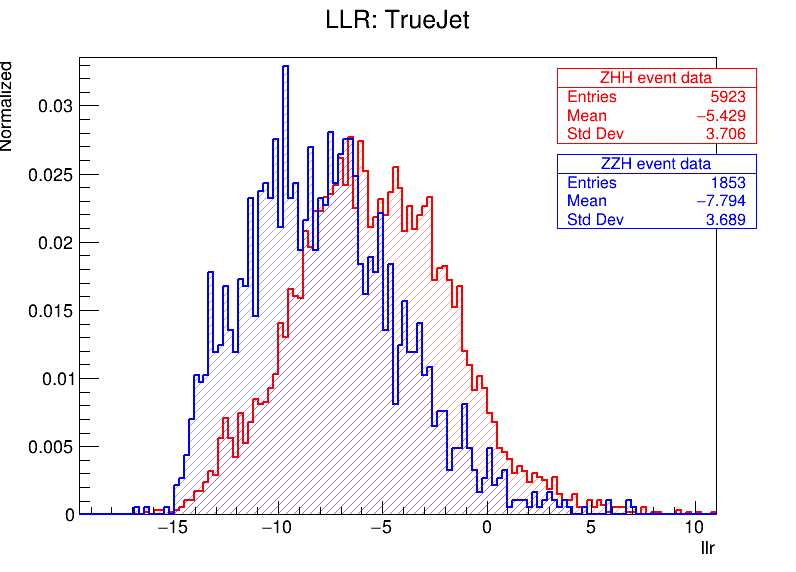

In [21]:
plot_hist(llr, x = ["zhh_llr", "zzh_llr"], labels=["ZHH event data", "ZZH event data"], title="LLR: TrueJet", normalize=True, xlabel="llr")

Region A

<Axes: xlabel='true_type', ylabel='count'>

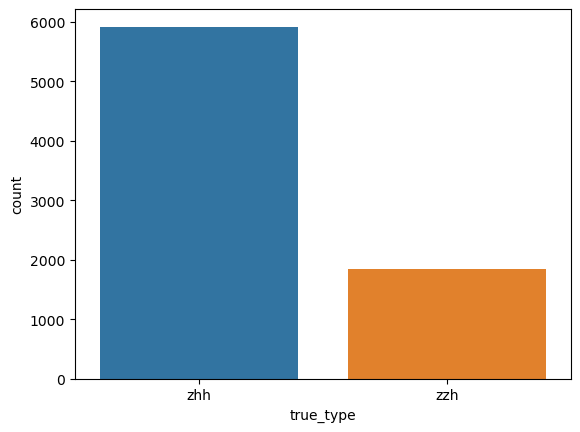

: 

In [29]:
sns.countplot(data_reco, x="true_type")

<Axes: xlabel='misclustering_region', ylabel='count'>

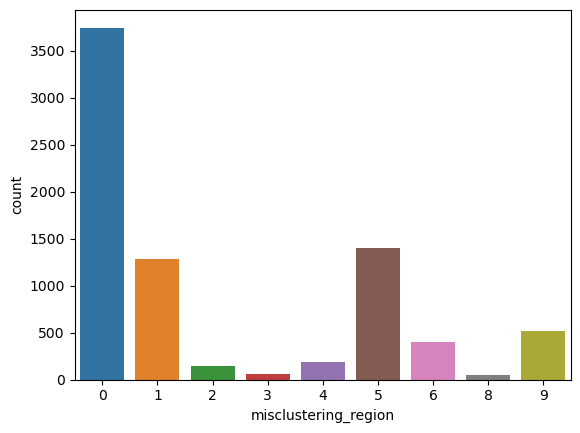

In [24]:
sns.countplot(data_reco, x="misclustering_region") # {"AA",0.}, {"AB",1.}, {"AC",2.}, {"AD",3.}, {"BB",4.}, {"BC",5.}, {"BD",6.}, {"CC",7.}, {"CD",8.}, {"DD",9.}

In [27]:
data_reco.columns

Index(['run', 'event', 'error_code', 'is_zhh', 'is_zzh', 'passed_preselection',
       'true_h1_decay_pdg', 'true_h2_decay_pdg', 'true_z2_decay_pdg',
       'misclustering_region', 'misclustering_region_icns', 'h1_decay_pdg',
       'h2_decay_pdg', 'z2_decay_pdg', 'zhh_sigma', 'zhh_sigmall',
       'zhh_sigmalr', 'zhh_sigmarl', 'zhh_sigmarr', 'zhh_mz', 'zhh_mhh',
       'zhh_mzhh', 'zhh_phi', 'zhh_phif', 'zhh_phih', 'zhh_costheta',
       'zhh_costhetaf', 'zhh_costhetah', 'zzh_sigma', 'zzh_sigmalll',
       'zzh_sigmallr', 'zzh_sigmalrl', 'zzh_sigmalrr', 'zzh_sigmarrr',
       'zzh_sigmarrl', 'zzh_sigmarlr', 'zzh_sigmarll', 'zzh_mz1', 'zzh_mz2',
       'zzh_mzz', 'zzh_mzzh', 'zzh_mh', 'zzh_phi', 'zzh_phiz', 'zzh_phiz1f',
       'zzh_phiz2f', 'zzh_costheta', 'zzh_costhetaz', 'zzh_costhetaz1f',
       'zzh_costhetaz2f', 'zzh_sigmalr', 'true_type', 'zhh_nll', 'zzh_nll',
       'llr'],
      dtype='object')

In [16]:
misclustering_region = 0
data = data_reco

true_zzh = data[(data["is_zzh"] == 1) & (data["zhh_sigmalr"] > 0) & (data["zzh_sigmalr"] > 0) & (data["misclustering_region"] == misclustering_region)].copy()
true_zhh = data[(data["is_zhh"] == 1) & (data["zhh_sigmalr"] > 0) & (data["zzh_sigmalr"] > 0) & (data["misclustering_region"] == misclustering_region)].copy()

true_zzh.reset_index(drop=True,inplace=True)
true_zhh.reset_index(drop=True,inplace=True)

llr = combine_columns({ "zhh_llr": true_zhh["llr"], "zzh_llr": true_zzh["llr"] })

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH event data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH event data (Potential memory leak).


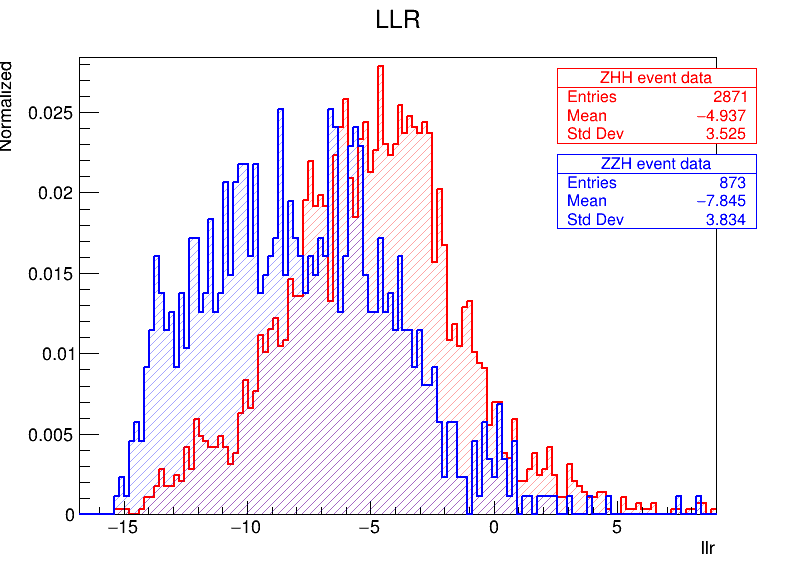

In [17]:
plot_hist(pd.DataFrame({ "zhh_llr": true_zhh["llr"], "zzh_llr": true_zzh["llr"] }), x = ["zhh_llr", "zzh_llr"], labels=["ZHH event data", "ZZH event data"], title="LLR", normalize=True, xlabel="llr")